In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Add layer

Normally, define a `add_layer` function that takes `weights`, `biases` and `activation function` as input.

In [2]:
def add_layer(inputs, in_size, out_size, activation_function = None):
    # Randomize weights
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    # Just avoid 0 init biases
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    # Linear combination
    wx_plus_b = tf.matmul(inputs, weights) + biases
    
    if activation_function is None:
        outputs = wx_plus_b
    else:
        outputs = activation_function(wx_plus_b)
    return outputs

## Import data

In [3]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise
print("x_data: ", np.shape(x_data))
print("y_data: ", np.shape(y_data))
print("noise: ", np.shape(noise))

x_data:  (300, 1)
y_data:  (300, 1)
noise:  (300, 1)


Use `placeholder` for data.

In [4]:
xs = tf.placeholder(tf.float32, [None, 1]) # 'None' means any # will be fine
ys = tf.placeholder(tf.float32, [None, 1])

## Build the network

One input layer, one hidden layer with 10 units, and one output layer

In [5]:
l1 = add_layer(xs, 1, 10, activation_function = tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function = None)

loss = tf.reduce_mean(tf.square(ys - prediction))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)  # 0.1 is the learning rate

init = tf.global_variables_initializer()

session = tf.Session()
session.run(init)

## Train


In [6]:
for i in range(1000):
    session.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 100 == 0:
        print(session.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.322258
0.00807631
0.00699178
0.00647182
0.00605038
0.00564812
0.00532116
0.00501917
0.00472446
0.00444679


## Visualization

In [7]:
x = x_data.flatten()
print(np.shape(x))

(300,)


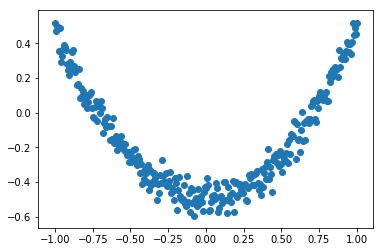

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data.flatten(), y_data.flatten())
plt.show()

We want to visualize the process. We will refresh the graph every 50 steps, and then pause for 0.1 seconds.

In [9]:
# Using pop-up graph instead of inline, so that we can refresh
%matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()  # Enable interactive mode, making sure plot is shown immediately. Otherwise only the final one is shown.
for i in range(1000):
    session.run(train_step, feed_dict = {xs: x_data, ys: y_data})
    if i % 50 == 0:
        prediction_value = session.run(prediction, feed_dict = {xs: x_data, ys: y_data})
        line, = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)  # There is still some bug with 'pause'. After calling this, the plot window cannot be closed :(...
        line.remove()

Using matplotlib backend: MacOSX
